In [1]:
pip install snscrape pandas numpy nltk matplotlib seaborn wordcloud


Note: you may need to restart the kernel to use updated packages.


Found existing installation: snscrape 0.7.0.20230622
Uninstalling snscrape-0.7.0.20230622:
  Successfully uninstalled snscrape-0.7.0.20230622
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv(r"C:\Users\Dhanu\cricket_tweets.csv", encoding='utf-8')

# Or if that path fails, use the one you uploaded:
# df = pd.read_csv("/mnt/data/cricket_tweets.csv")

df.head()


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1433440359477096453,Cricket World,Global,Official Twitter account of Cricket World - ne...,2009-01-23 10:49:02,58699,9834,90829,True,2021-09-02 14:43:08,🏏 Rizwan Cheema has been named team captain of...,NaN,Twitter Web App,0,0,False
1,1433438874995343361,Ⓜ️ithun,"मुंबई, भारत",Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳,2010-01-09 15:38:06,7,97,343,False,2021-09-02 14:37:14,Virat Kohli being fixated on retaining specifi...,NaN,Twitter for Android,0,0,False
2,1433436646645501956,Akram Khan,NaN,BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms,2014-07-08 00:39:28,1455,39,8486,False,2021-09-02 14:28:23,"My tribute to the world's fastest bowler ever,...",['shoaibakhtarpeaceambassador'],Twitter Web App,1,3,False
3,1433433904438931474,Mr.P,"Mumbai, India",nothing,2013-08-25 10:07:10,15,675,4590,False,2021-09-02 14:17:29,this guy's life is incomplete without Kohli's ...,NaN,Twitter for Android,0,5,False
4,1433433383024005131,Cricket_Kith,NaN,"Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...",2021-09-01 11:39:18,0,6,27,False,2021-09-02 14:15:25,When Rishabh Pant Stepped Out Robinson 😂\nWhol...,"['ENGvIND', 'Cricket', 'BCCI', 'Ovaltest', 'No...",Twitter for Android,0,1,False


In [9]:
# STEP 2 — CLEAN AND PREPARE DATA 

# Keep only useful columns
df = df[['date', 'text']].dropna()

# Remove duplicates
df = df.drop_duplicates(subset='text')

# Clean the text: remove links, mentions, hashtags, emojis, and special chars
import re
df['clean_text'] = df['text'].apply(lambda x: re.sub(r'http\S+|www.\S+|@\S+|#[A-Za-z0-9_]+|[^A-Za-z\s]', '', str(x)))

# Convert to lowercase
df['clean_text'] = df['clean_text'].str.lower()

# Show cleaned sample
df[['text', 'clean_text']].head()


,text,clean_text
0,🏏 Rizwan Cheema has been named team captain of...,rizwan cheema has been named team captain of ...
1,Virat Kohli being fixated on retaining specifi...,virat kohli being fixated on retaining specifi...
2,"My tribute to the world's fastest bowler ever,...",my tribute to the worlds fastest bowler ever ...
3,this guy's life is incomplete without Kohli's ...,this guys life is incomplete without kohlis fa...
4,When Rishabh Pant Stepped Out Robinson 😂\nWhol...,when rishabh pant stepped out robinson \nwhole...


In [10]:
# STEP 3 — SENTIMENT ANALYSIS USING VADER

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define sentiment label based on score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

# Show sample output
df[['clean_text', 'sentiment_score', 'sentiment_label']].head(10)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,sentiment_score,sentiment_label
0,rizwan cheema has been named team captain of ...,0.0000,Neutral
1,virat kohli being fixated on retaining specifi...,0.0000,Neutral
2,my tribute to the worlds fastest bowler ever ...,0.0000,Neutral
3,this guys life is incomplete without kohlis fa...,-0.2018,Negative
4,when rishabh pant stepped out robinson \nwhole...,0.0000,Neutral
5,a new podcast you say\n\nwell why not\n\nepis...,0.4939,Positive
6,classic by well played boy \n\n,0.5423,Positive
7,kohli looks in a sublime touch\n,0.0000,Neutral
8,\n\nvirat kohli for you \n,0.0000,Neutral
9,\n\nsrilanka score under runs at odds\n\n...,0.0000,Neutral


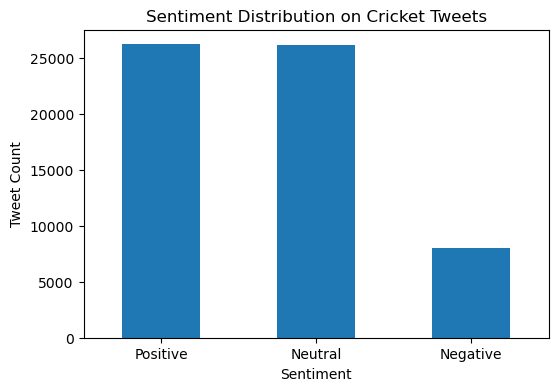

In [11]:
# STEP 4 — VISUALIZE SENTIMENT DISTRIBUTION

import matplotlib.pyplot as plt

# Count each sentiment type
sentiment_counts = df['sentiment_label'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution on Cricket Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.show()


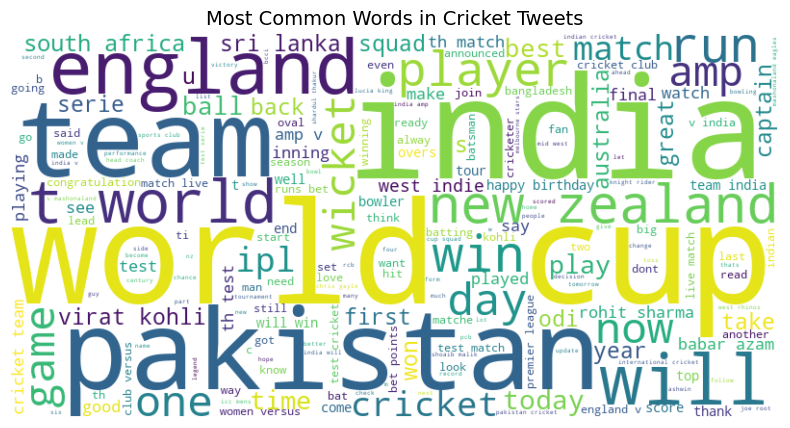

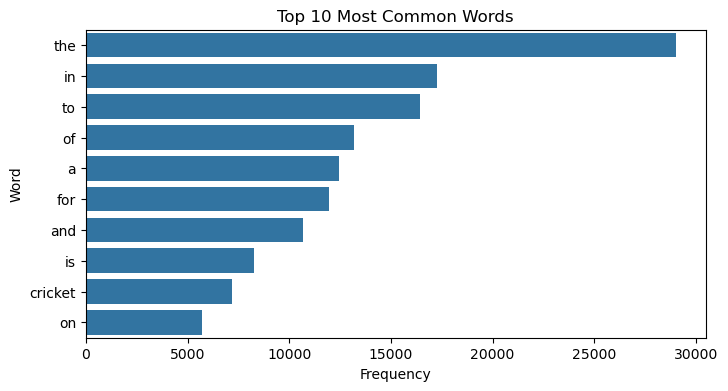

In [12]:
# STEP 5 — WORD CLOUD & FREQUENCY ANALYSIS

from wordcloud import WordCloud
import seaborn as sns

# Combine all cleaned tweets
all_text = ' '.join(df['clean_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Cricket Tweets", fontsize=14)
plt.show()

# BONUS: Top 10 most frequent words
from collections import Counter

word_freq = Counter(" ".join(df['clean_text']).split())
common_words = pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency'])

plt.figure(figsize=(8,4))
sns.barplot(x='Frequency', y='Word', data=common_words)
plt.title("Top 10 Most Common Words")
plt.show()


In [13]:
# STEP 6 — EXPORT FINAL DATA

# Save the cleaned + sentiment-labelled dataset
df.to_csv("Cricket_Tweets_Sentiment_Analysis.csv", index=False, encoding='utf-8')

print("✅ Exported successfully as 'Cricket_Tweets_Sentiment_Analysis.csv'")
print("Rows:", len(df))


✅ Exported successfully as 'Cricket_Tweets_Sentiment_Analysis.csv'
Rows: 60530
